# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yohanes Teguh Ukur Ginting
- **Email:** yohanes.teguh36@gmail.com
- **ID Dicoding:** johnteguh

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan season mempengaruhi jumlah sepeda yang disewa
- Bagaimana holiday mempengaruhi jumlah sepeda yang disewa

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/johnteguh/Dicoding-Bike-Sharing-Dataset/main/Data/day.csv")
df.head()
# print(df)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

In [9]:
df["season"] = df["season"].astype('object')

Digunakan untuk mengubah data type pada kolom seasono menjadi object untuk dapat menyimpan string

In [10]:
seasons = ["springer", "summer", "fall", "winter"]

for index, column in enumerate(seasons):
    print(index+1, column)
    df["season"] = df["season"].replace(index+1, column)

1 springer
2 summer
3 fall
4 winter


Digunakan untuk mengubah value pada kolom season sesuai penjelasan data set

In [11]:
print(df["season"].value_counts())

season
fall        188
summer      184
springer    181
winter      178
Name: count, dtype: int64


In [12]:
df["dteday"]=pd.to_datetime(df["dteday"])

Mengubah tipe data dteday yaitu object menjadi tipe data datetime

In [13]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [131]:
df.to_csv("fixed.csv", index=False)

Untuk menyimpan data yang sudah dibersihkan 

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
season_distribution_mean = df.groupby('season')['cnt'].mean()
print(season_distribution_mean)

season
fall        5644.303191
springer    2604.132597
summer      4992.331522
winter      4728.162921
Name: cnt, dtype: float64


Untuk melakukan groupby terhadap kolom season dan kolom cnt dan menghitung rata ratanya

In [15]:
season_distribution_sum = df.groupby('season')['cnt'].sum()
print(season_distribution_sum)

season
fall        1061129
springer     471348
summer       918589
winter       841613
Name: cnt, dtype: int64


Untuk melakukan groupby terhadap kolom season dan kolom cnt dan menghitung totalnya

In [16]:
start_date = pd.Timestamp('2012-01-01')
end_date = pd.Timestamp('2012-12-05')
daily_cnt = df.groupby('dteday')['cnt'].sum()
filtered_daily_cnt = daily_cnt.loc[(daily_cnt.index >= start_date) & (daily_cnt.index <= end_date)]
print(filtered_daily_cnt)
# print(daily_cnt)


dteday
2012-01-01    2294
2012-01-02    1951
2012-01-03    2236
2012-01-04    2368
2012-01-05    3272
              ... 
2012-12-01    5191
2012-12-02    4649
2012-12-03    6234
2012-12-04    6606
2012-12-05    5729
Name: cnt, Length: 340, dtype: int64


Melakukan filter terhadap kolom dteday dimana dimulai pada start_date dan di akhiri pada end_date dan menampilkan data pada kolom cnt

## Visualization & Explanatory Analysis

### Pertanyaan 1:

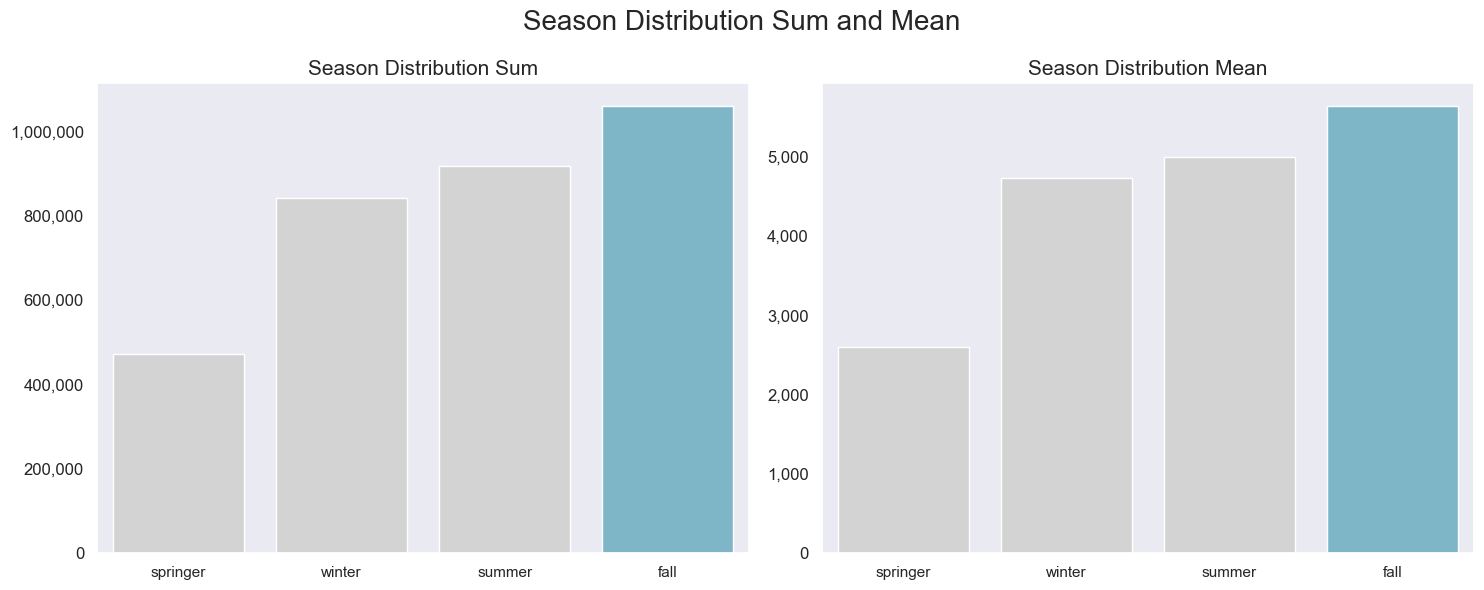

In [136]:
# Sort season_distribution_mean by value
season_distribution_mean = season_distribution_mean.sort_values()

# Sort season_distribution_sum by value
season_distribution_sum = season_distribution_sum.sort_values()

# FILEPATH: /c:/Users/TEGUH/Documents/Kuliah/Semester_6/Bangkit/Dicoding_DataAnalys/Final_Project/Proyek_Analisis_Data.ipynb
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))  # Change nrows to 1 and ncols to 2

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

# Chart for season_distribution_sum
sns.barplot(x=season_distribution_sum.index, y=season_distribution_sum.values, hue=season_distribution_sum.index, palette=colors[:len(season_distribution_sum)], ax=ax[0], legend=False)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Season Distribution Sum", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)  # Change tick params to 'y' for vertical bar chart
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis labels as integers with commas

# Chart for season_distribution_mean
sns.barplot(x=season_distribution_mean.index, y=season_distribution_mean.values, hue=season_distribution_mean.index, palette=colors[:len(season_distribution_mean)], ax=ax[1], legend=False)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Season Distribution Mean", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)  # Change tick params to 'y' for vertical bar chart
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis labels as integers with commas

plt.suptitle("Season Distribution Sum and Mean", fontsize=20)
plt.tight_layout()
plt.show()


Melakukan visualisasi dengan bar chart dengan menampilkan data sum dan data mean yang sudah dihitung dan di tampilkan bersampingan

### Pertanyaan 2:

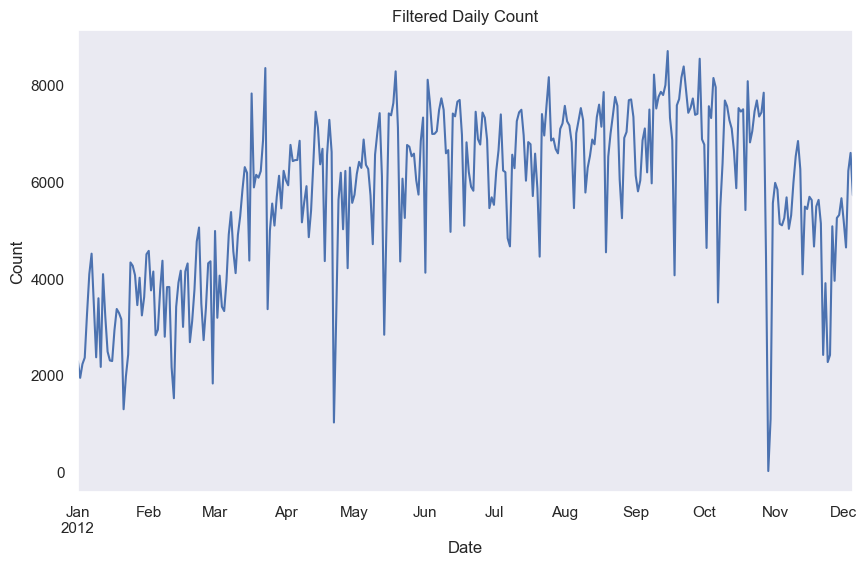

In [137]:
filtered_daily_cnt.plot(kind='line', figsize=(10, 6))
plt.title('Filtered Daily Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


Melakukan visualisasi dengan line chart dengan menampilkan data count dan date berdasarkan hari dimulai dan di akhiri

## Conclusion

- Conclution pertanyaan 1 <br>
```Dapat dilihat bahwa pada saat season merupakan Fall, banyaknya peminjam sepeda adalah tertinggi berdasarkan sum dan mean ```
- Conclution pertanyaan 2 <br>
``` Dapat dilihat bagaimana banyaknya peminjam sepeda perhari sebanyak hari yang ditentukan dari tanggal mulai sampai tanggal akhir```